In [1]:
import pandas as pd
import numpy as np
import fasttext as ft
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("../Datasets/Question_Classification_Dataset.csv")
df = df.drop(["Unnamed: 0", "Category1"], axis=1)
df.columns = ["Q", "C1", "C2"]
df

,Q,C1,C2
0,How did serfdom develop in and then leave Russ...,DESCRIPTION,manner
1,What films featured the character Popeye Doyle ?,ENTITY,cremat
2,How can I find a list of celebrities ' real na...,DESCRIPTION,manner
3,What fowl grabs the spotlight after the Chines...,ENTITY,animal
4,What is the full form of .com ?,ABBREVIATION,exp
...,...,...,...
5447,What 's the shape of a camel 's spine ?,ENTITY,other
5448,What type of currency is used in China ?,ENTITY,currency
5449,What is the temperature today ?,NUMERIC,temp
5450,What is the temperature for cooking ?,NUMERIC,temp


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       5452 non-null   object
 1   C1      5452 non-null   object
 2   C2      5452 non-null   object
dtypes: object(3)
memory usage: 127.9+ KB


## Exploratory data analysis

In [4]:
df.describe()

,Q,C1,C2
count,5452,5452,5452
unique,5381,6,47
top,What is the speed of the Mississippi River ?,ENTITY,ind
freq,3,1250,962


C:\Users\angai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C1', ylabel='count'>

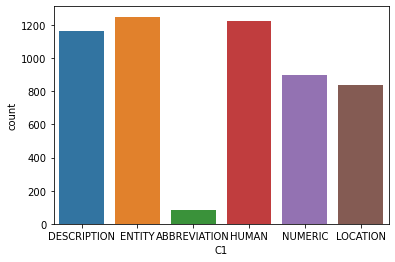

In [5]:
sns.countplot(df.C1)

In [6]:
# sns.countplot(df.C2)
df["C2"].value_counts()

ind          962
other        733
def          421
count        363
desc         321
manner       276
date         218
cremat       207
reason       191
gr           189
country      155
city         129
animal       112
dismed       103
food         103
termeq        93
period        75
money         71
exp           70
state         66
sport         62
event         56
product       42
substance     41
color         40
techmeth      38
dist          34
veh           27
perc          27
word          26
title         25
mount         21
body          16
abb           16
lang          16
volsize       13
plant         13
weight        11
symbol        11
instru        10
code           9
speed          9
letter         9
temp           8
ord            6
currency       4
religion       4
Name: C2, dtype: int64

In [7]:
df.isnull().sum()

Q     0
C1    0
C2    0
dtype: int64

In [8]:
df.drop_duplicates()

,Q,C1,C2
0,How did serfdom develop in and then leave Russ...,DESCRIPTION,manner
1,What films featured the character Popeye Doyle ?,ENTITY,cremat
2,How can I find a list of celebrities ' real na...,DESCRIPTION,manner
3,What fowl grabs the spotlight after the Chines...,ENTITY,animal
4,What is the full form of .com ?,ABBREVIATION,exp
...,...,...,...
5447,What 's the shape of a camel 's spine ?,ENTITY,other
5448,What type of currency is used in China ?,ENTITY,currency
5449,What is the temperature today ?,NUMERIC,temp
5450,What is the temperature for cooking ?,NUMERIC,temp


In [58]:
import re
def preprocess(text):
    text = re.sub(r'\([\w]\)','', text)
    text = re.sub(r'[^\w\s\']',' ', text)
    # Replace all the white spaces, punctuations with a single space
    text = re.sub(r'[ \n]+', ' ', text)
    if "'s" in text:
        text = text.replace(" 's", "'s", text.count("'s")) 
        text = text[:-2]
    # Replace all multiple spaces and \n characters with a single space
    return text.strip().lower()
    

In [11]:
df["Q"] = df["Q"].apply(preprocess)

In [12]:
def lemmatize(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    l = []
    for word in doc:
        if word.is_punct:
            pass
        else:
            l.append(word.lemma_)
    return " ".join(l)
            

In [13]:
tqdm.pandas()
df["Q"] = df["Q"].progress_apply(lemmatize)

  0%|          | 0/5452 [00:00<?, ?it/s]

In [15]:
df["desc_C1"] = "__label__" + df["C1"] + " " + df["Q"]
df["desc_C2"] = "__label__" + df["C2"] + " " + df["Q"]

In [17]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df["desc_C1"], test_size=0.3, random_state=42)
train2, test2 = train_test_split(df["desc_C2"], test_size=0.3, random_state=42)

3383    __label__HUMAN who share a new york city apart...
618     __label__HUMAN what first name be nipsy russel...
4677    __label__ENTITY what be the main language of s...
2881               __label__DESCRIPTION what be a conifer
124     __label__DESCRIPTION how do chicken have baby ...
                              ...                        
3772    __label__NUMERIC how much coca cola be drunk i...
5191    __label__LOCATION what cathedral be thomas bec...
5226    __label__HUMAN what character in the beverly h...
5390    __label__LOCATION what do the river seine empt...
860     __label__HUMAN what u s congressman say keep t...
Name: desc_C1, Length: 3816, dtype: object

In [19]:
train1.to_csv("../Datasets/Questions.train_C1", 
             index=False, header=None)
train2.to_csv("../Datasets/Questions.train_C2", 
             index=False, header=None)
test1.to_csv("../Datasets/Questions.test_C1", 
             index=False, header=None)
test2.to_csv("../Datasets/Questions.test_C2", 
             index=False, header=None)

In [20]:
model1 = ft.train_supervised(input = "../Datasets/Questions.train_C1")

In [21]:
model2 = ft.train_supervised(input = "../Datasets/Questions.train_C2")

In [22]:
model1.test("../Datasets/Questions.test_C1")

(1636, 0.7591687041564792, 0.7591687041564792)

In [23]:
model2.test("../Datasets/Questions.test_C2")

(1636, 0.41687041564792177, 0.41687041564792177)

In [36]:
text = "what is the full form of com"
text = lemmatize(preprocess(text))
model2.predict(text)

(('__label__other',), array([0.17273194]))

In [37]:
# df["len"] = df["Q"].apply(lambda x : len(x))

In [41]:
model1.save_model("../Datasets/Model_C1")
model2.save_model("../Datasets/Model_C2")